In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data/"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
# Read in the data
full_train_set = pd.read_csv('data/train.csv')
submission_test_set = pd.read_csv('data/test.csv')

In [3]:
y = full_train_set.target
X = full_train_set.drop('target', axis=1)
X.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
submission_test_set.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
# Check class balance - class imbalance 1:9
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [6]:
X.shape, submission_test_set.shape

((200000, 201), (200000, 201))

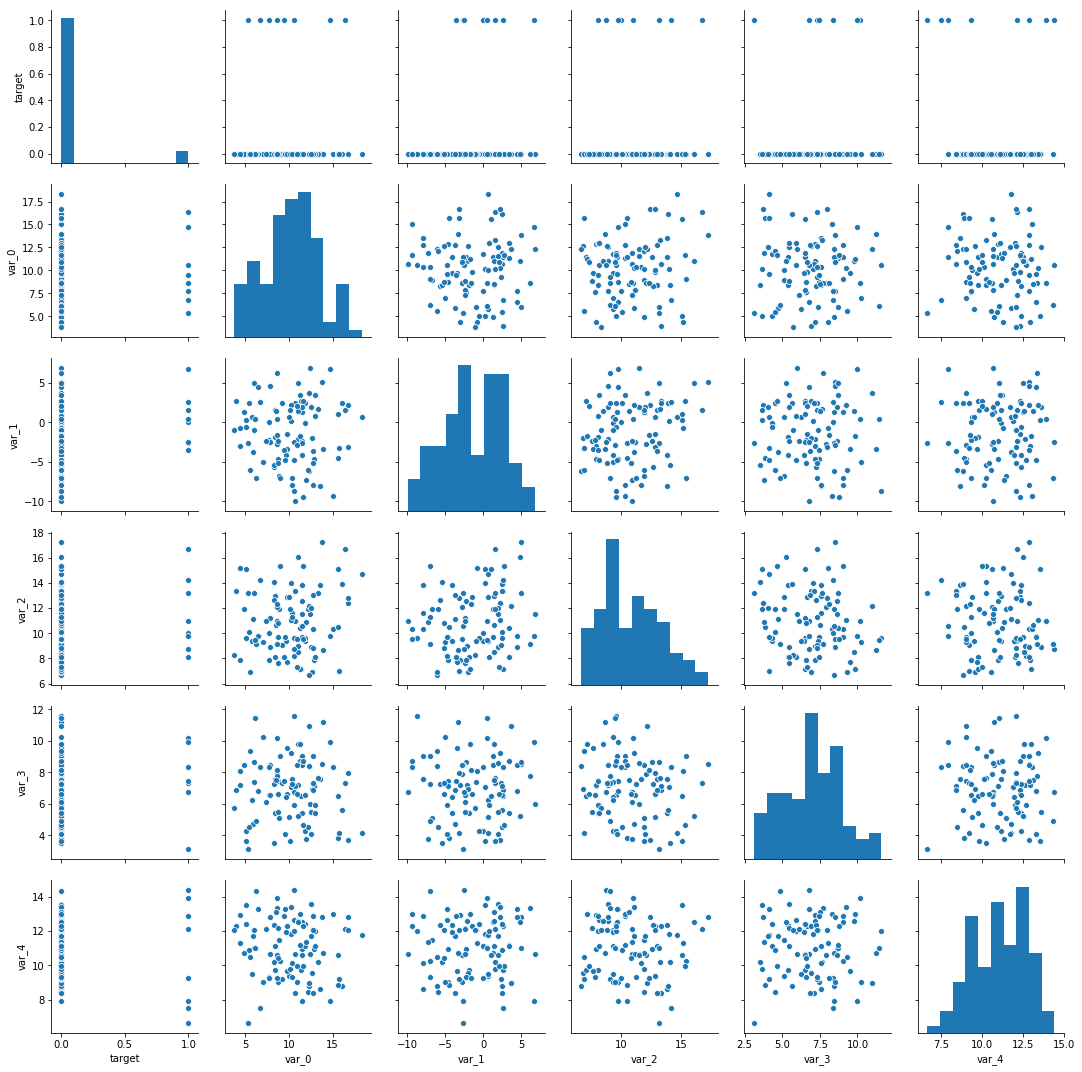

In [7]:
sns.pairplot(full_train_set.iloc[0:100, 0:7])

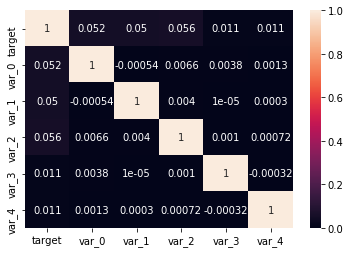

In [8]:
sns.heatmap(full_train_set.iloc[:, 0:7].corr(), annot=True)

In [9]:
full_train_set.var_0.unique().shape

(94672,)

In [10]:
full_train_set.shape

(200000, 202)

In [11]:
submission_test_set.var_0.unique().shape

(65580,)

In [12]:
train_unique_values = []
for col in full_train_set:
    train_unique_values.append(full_train_set[col].unique().shape[0])
    
train_unique_values = train_unique_values[2:]
    
test_unique_values = []
for col in submission_test_set:
    test_unique_values.append(submission_test_set[col].unique().shape[0])
    
test_unique_values = test_unique_values[1:]

len(train_unique_values), len(test_unique_values)

(200, 200)

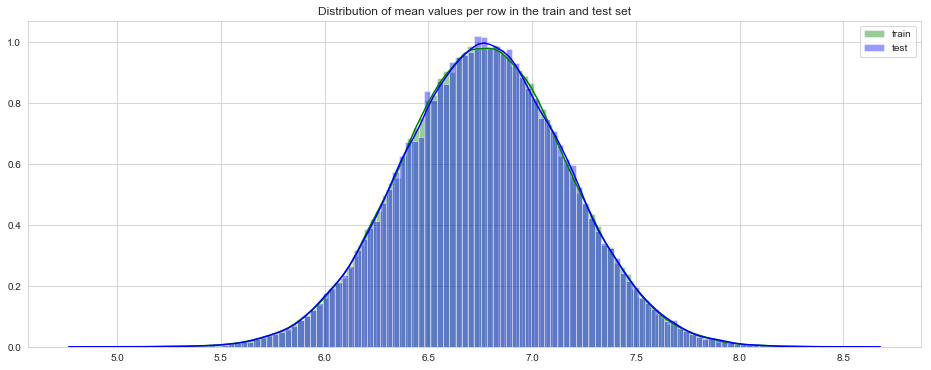

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(X.mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(submission_test_set.mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.savefig("mean_values.png")
plt.show()

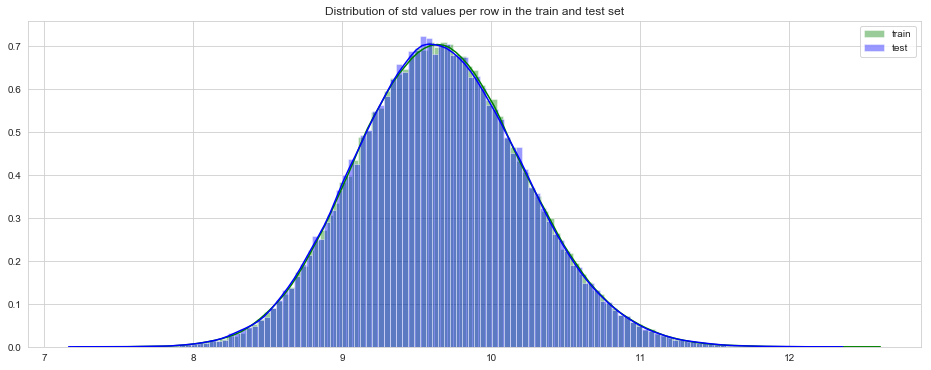

In [46]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(X.std(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(submission_test_set.std(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.savefig("std_values.png")
plt.show()

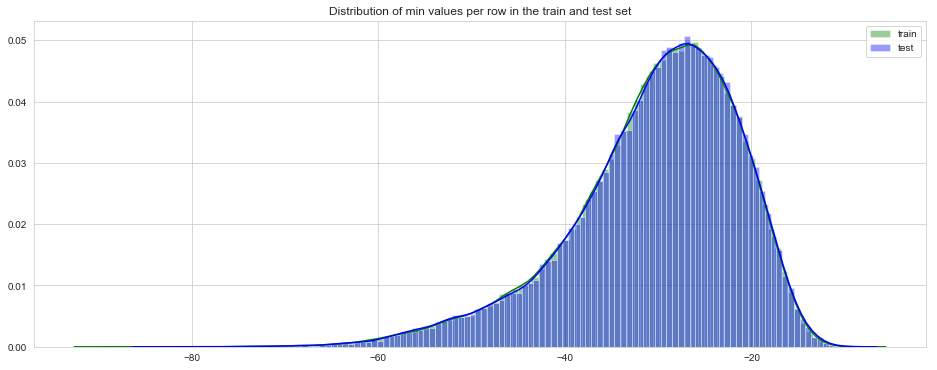

In [47]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(X.min(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(submission_test_set.min(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.savefig("min_values.png")
plt.show()

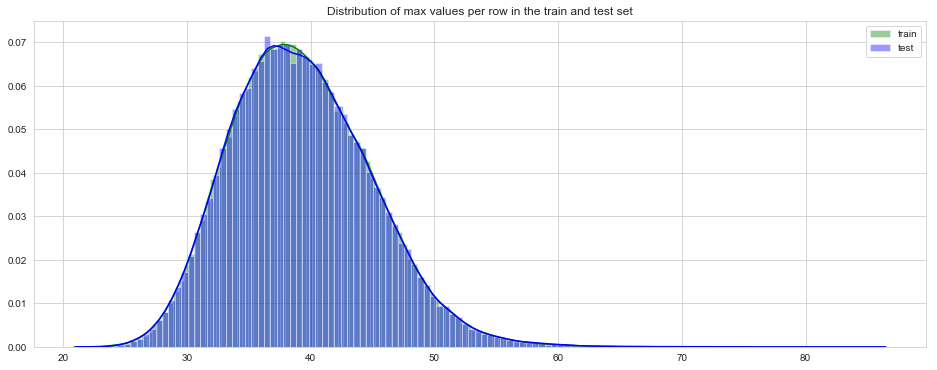

In [48]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(X.max(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(submission_test_set.max(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.savefig("max_values.png")
plt.show()

In [53]:
concatenated = pd.concat([train_unique_values.assign(dataset='set1'), test_unique_values.assign(dataset='set2')])

AttributeError: 'list' object has no attribute 'assign'

In [ ]:
sns.lineplot(x='Std', y='ATR', data=concatenated,
                hue='Asset Subclass', style='dataset')
plt.show()

In [58]:
df_train = pd.DataFrame(train_unique_values)
df_test = pd.DataFrame(test_unique_values)

In [70]:
concatenated = pd.concat([df_train, df_test], axis=1)
concatenated.columns = ["Train", "Test"]

In [71]:
concatenated.head()

,Train,Test
0,94672,65580
1,108932,71661
2,86555,61865
3,74597,56507
4,63515,49995


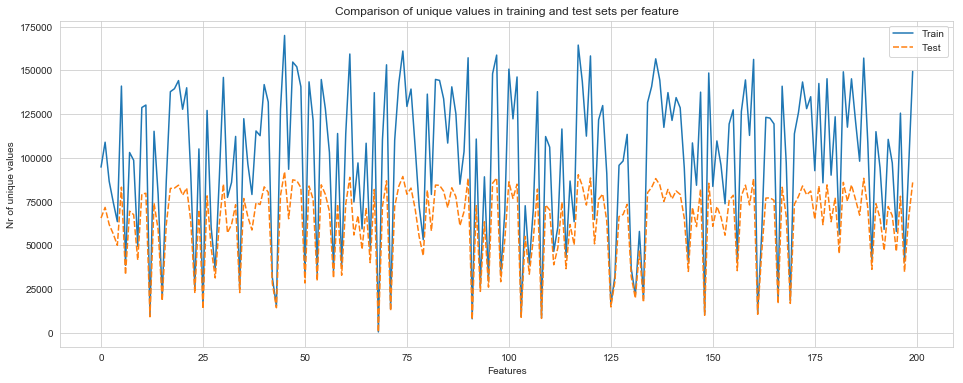

In [75]:
plt.figure(figsize=(16,6))
plt.title("Comparison of unique values in training and test sets per feature")
ax = sns.lineplot(data=concatenated)
ax.set(xlabel='Features', ylabel='Nr of unique values')
#sns.lineplot(data=df_test,color="blue", label='test')
plt.legend()
plt.savefig("train_test_unique_seaborn.png")
plt.show()

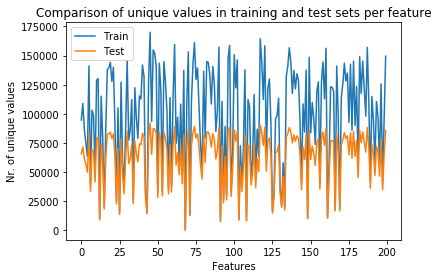

In [32]:
plt.plot(train_unique_values, label="Train")
plt.plot(test_unique_values, label="Test")
plt.xlabel("Features")
plt.ylabel("Nr. of unique values")
plt.title("Comparison of unique values in training and test sets per feature")
plt.legend(loc="upper left")
plt.savefig("train_test_unique.png")
plt.show()

#### Test set has two times less unique values

In [14]:
# https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split
df_test = pd.DataFrame.copy(submission_test_set)
df_test.drop(['ID_code'], axis=1, inplace=True)
df_test = df_test.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in tqdm(range(df_test.shape[1])):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))


100000
100000


In [15]:
submission_test_set.shape

(200000, 201)

In [16]:
# Drop the synthetic rows
submission_test_set.drop(synthetic_samples_indexes, inplace=True)
submission_test_set.shape

(100000, 201)

In [17]:
# Use stratifiedshufflesplit to get equal class imbalance in each set
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [18]:
# Create val set
for train_index, val_index in sss.split(X_train, y_train):
    X_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

In [19]:
# Move ID_code to index
X_train.set_index('ID_code', inplace=True)
X_val.set_index('ID_code', inplace=True)
X_test.set_index('ID_code', inplace=True)
submission_test_set.set_index('ID_code', inplace=True)

In [20]:
# Feature selection
#from boostaroota import BoostARoota
#r = BoostARoota(metric='aucpr')
#br = BoostARoota(metric='logloss')
#Fit the model for the subset of variables
#br.fit(X_train, y_train)

#Can look at the important variables - will return a pandas series
#br.keep_vars_

#Then modify dataframe to only include the important variables
#br.transform(x)

In [21]:
# Boruta
#from sklearn.ensemble import RandomForestClassifier
#from boruta import BorutaPy
#rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=6)
#boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
#boruta_selector.fit(X_train.values, y_train.values)

In [22]:
import catboost

In [23]:
# Train CatBoost model as base reference
from catboost import CatBoostClassifier, Pool, cv
model = CatBoostClassifier(
    eval_metric='WKappa',
    random_seed=42,
    logging_level='Silent',
    use_best_model=True
)

model.fit(
    X_train, y_train,
    #cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [24]:
# Predict and find AUC on test set
from sklearn.metrics import roc_auc_score, confusion_matrix
y_predict = model.predict(X_test)
roc_test_score = roc_auc_score(y_test, y_predict)
print(roc_test_score)
cm = confusion_matrix(y_test, y_predict)
print(cm)




0.6704572606672033
[[35492   488]
 [ 2595  1425]]


In [25]:
y_submission_predict = model.predict(submission_test_set)
y_submission_predict = y_submission_predict.astype(int)

In [26]:
y_submission_predict

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
np.bincount(y_submission_predict)

array([95370,  4630], dtype=int64)

In [28]:
submission_variable = pd.DataFrame({'ID_code' : submission_test_set.index.values, 'target': y_submission_predict})

In [29]:
submission_variable

,ID_code,target
0,test_3,0
1,test_7,0
2,test_11,0
3,test_15,0
4,test_16,0
5,test_17,0
6,test_18,0
7,test_20,0
8,test_21,0
9,test_22,0


In [30]:
submission_variable.to_csv('csv_to_submit.csv', index=False)

<a href="csv_to_submit.csv"> Download File </a>

In [31]:
print(os.listdir("output/"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'output/'

In [ ]:
print(os.listdir("working/"))

In [33]:
from imblearn.over_sampling import SMOTE


C:\Users\Rain\Anaconda3\envs\nn_project\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [34]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [35]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (230276, 200)
After OverSampling, the shape of train_y: (230276,) 

After OverSampling, counts of label '1': 115138
After OverSampling, counts of label '0': 115138


In [37]:
model = CatBoostClassifier(
    eval_metric='WKappa',
    random_seed=42,
    logging_level='Silent',
    use_best_model=True
)

model.fit(
    X_train_res, y_train_res,
    #cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
y_predict = model.predict(X_test)
roc_test_score = roc_auc_score(y_test, y_predict)
print(roc_test_score)
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.6569315042353546
[[33203  2777]
 [ 2448  1572]]


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


ImportError: DLL load failed: The specified procedure could not be found.

In [ ]:
def roc_score(y_score, y_true):
    return tf.py_function(roc_auc_score, (y_score, y_true), tf.double)

def f1_keras(y_score, y_true):
    return tf.py_function(f1_score, (y_score, y_true), tf.double)

keras_model = Sequential()
keras_model.add(Dense(200, activation="relu", input_dim=200))
keras_model.add(Dense(100, activation="relu"))
keras_model.add(Dense(1, activation="softmax"))

rmsprop = optimizers.RMSprop(lr=0.01)

keras_model.compile(
    optimizer=rmsprop,
    loss="binary_crossentropy",
    metrics=[roc_score])
keras_model.summary()

In [ ]:
#class_weight={0:1., 1:10.}
keras_model.fit(X_train_res, y_train_res, epochs=20, batch_size=256)
score = keras_model.evaluate(X_test, y_test, batch_size=256)
print(score)